In [262]:
import pandas as pd
import os
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [263]:
def load_files(practice_num):
    
    practice_num = str(practice_num)
    ez = pd.read_csv(os.path.join('practices', practice_num, 'ez.csv')) 
    sl = pd.read_csv(os.path.join('practices', practice_num, 'sl.csv'))
    
    return ez, sl

In [264]:
# Test data for visualisation purposes 

test_ez, test_sl = load_files(1)  # Test
test_ez.head()

,Event Start,Unnamed: 1,Unnamed: 2,Unnamed: 3,Event End,Unnamed: 5,Unnamed: 6,Unnamed: 7,Video File of Timestamp,Event Label,Contacting Object,Opposing object,Comments (Do not use commas)
0,Hr,Min,Sec,Frame,Hr,Min,Sec,Frame,Filename of video used for event time,NaN,NaN,NaN,NaN
1,5,2,3,NaN,5,4,2,NaN,EZ2 JG_11_21,NaN,NaN,NaN,NaN
2,5,4,2,NaN,5,8,17,NaN,EZ2 JG_11_21,NV,NaN,NaN,NaN
3,5,8,17,NaN,5,9,18,NaN,EZ2 JG_11_21,NC,NaN,NaN,NaN
4,5,9,18,NaN,5,9,20,NaN,EZ2 JG_11_21,B,U,B,NaN


In [265]:
# Name columns

def name_columns(ez, sl):
    columns = ['hr_start', 'min_start', 'sec_start', 'frame_start', 'hr_end', 'min_end', 'sec_end', 'frame_end', 'filename', 'label', 'contacting object', 'opposing object', 'comments']
    ez.columns = columns
    sl.columns = columns
    
    return ez, sl

test_ez, test_sl = name_columns(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,frame_start,hr_end,min_end,sec_end,frame_end,filename,label,contacting object,opposing object,comments
0,Hr,Min,Sec,Frame,Hr,Min,Sec,Frame,Filename of video used for event time,NaN,NaN,NaN,NaN
1,5,2,3,NaN,5,4,2,NaN,EZ2 JG_11_21,NaN,NaN,NaN,NaN
2,5,4,2,NaN,5,8,17,NaN,EZ2 JG_11_21,NV,NaN,NaN,NaN
3,5,8,17,NaN,5,9,18,NaN,EZ2 JG_11_21,NC,NaN,NaN,NaN
4,5,9,18,NaN,5,9,20,NaN,EZ2 JG_11_21,B,U,B,NaN


In [266]:
# Get columns of interest

def columns_of_interest(ez, sl):
    columns_of_interest = ['hr_start', 'min_start', 'sec_start', 'label', 'contacting object', 'opposing object']
    ez = ez[columns_of_interest]
    sl = sl[columns_of_interest]
    
    return ez, sl

test_ez, test_sl = columns_of_interest(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,label,contacting object,opposing object
0,Hr,Min,Sec,NaN,NaN,NaN
1,5,2,3,NaN,NaN,NaN
2,5,4,2,NV,NaN,NaN
3,5,8,17,NC,NaN,NaN
4,5,9,18,B,U,B


In [267]:
# Cut off first index because Google Docs included titles as a row

def remove_first(ez, sl):
    ez = ez[1:]
    sl = sl[1:]
    
    return ez, sl

test_ez, test_sl = remove_first(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,label,contacting object,opposing object
1,5,2,3,NaN,NaN,NaN
2,5,4,2,NV,NaN,NaN
3,5,8,17,NC,NaN,NaN
4,5,9,18,B,U,B
5,5,9,20,NC,NaN,NaN


In [268]:
# Get only instances with head contact (HC label)

def isolate_hc(ez, sl):
    ez = ez[ez['label'] == 'HC']
    sl = sl[sl['label'] == 'HC']
    
    return ez, sl

test_ez, test_sl = isolate_hc(test_ez, test_sl)
test_ez.head()

,hr_start,min_start,sec_start,label,contacting object,opposing object
12,5,14,2,HC,HS,B
16,5,15,29,HC,HF,B


In [269]:
# Combine both into one DataFrame

def combine(ez, sl):

    df = pd.concat([ez, sl])
    df.sort_values(['hr_start', 'min_start', 'sec_start'])
    
    return df

df = combine(test_ez, test_sl)
df.head()

,hr_start,min_start,sec_start,label,contacting object,opposing object
12,5,14,2,HC,HS,B
16,5,15,29,HC,HF,B
2,5,12,38,HC,HS,HS
4,5,13,17,HC,HF,HF
7,5,14,2,HC,HF,HF


In [270]:
# Remove duplicate values

def drop_duplicates(df):

    df = df.drop_duplicates(subset=['hr_start', 'min_start', 'sec_start'], keep='last')
    
    return df

df = drop_duplicates(df)
df.head()

,hr_start,min_start,sec_start,label,contacting object,opposing object
2,5,12,38,HC,HS,HS
4,5,13,17,HC,HF,HF
7,5,14,2,HC,HF,HF
10,5,14,49,HC,HF,HF
13,5,15,29,HC,HF,HF


In [271]:
# Data type change

def labels_as_strings(ez, sl):
    ez['label'] = ez['label'].astype(str)
    sl['label'] = sl['label'].astype(str)
    
    return ez, sl

In [272]:
# Return number of head collisions

def count_head_impacts(df):

    return df['label'].value_counts()['HC']

count_head_impacts(df)

15

In [273]:
# Adds a new row 'play' to DataFrame, where '1' indicates a play, and '0' indicates a waiting period

def play_counter_row(df):
    
    y_cond = (df['label'].shift(1) == 'NC') & (df['label'] != 'NC')

    df['play'] = np.where(y_cond, '1', '0')

    return df

In [274]:
# Performs basic sanitation on dataset

def prep_data_pipeline(ez, sl):
    
    ez, sl = name_columns(ez, sl)
    
    ez, sl = columns_of_interest(ez, sl)
    
    ez, sl = labels_as_strings(ez, sl)
    
    ez, sl = remove_first(ez, sl)
    
    return ez, sl  

In [275]:
# Returns list of HC per practice

def hc_practice(practice_list):
    lyst = []

    for i in practice_list:
        lyst.append(hc_per_practice(i))
    
    return lyst

In [276]:
# Returns (mean, std)

def average_hc_play(practice_list):
    lyst = []

    for i in practice_list:
        lyst.append(hc_per_play(i))
    
    return lyst

In [277]:
# Calculates head contacts per practice

def hc_per_practice(number):
    
    ez, sl = load_files(number)
    
    ez, sl = prep_data_pipeline(ez, sl)
    
    ez, sl = isolate_hc(ez, sl)
    
    df = combine(ez, sl)
    
    df = drop_duplicates(df)
    
    count = count_head_impacts(df)
    
    return count

In [278]:
# Calculates average head impacts per play

def hc_per_play(number):
    
    ez, sl = load_files(number)
    
    ez, sl = prep_data_pipeline(ez, sl)
    
    df = combine(ez, sl)
    
    df = drop_duplicates(df)
    
    df = play_counter_row(df)
    
    plays = df.shape[0] - (df['play'].value_counts()['0'])
    
    hc = df['label'].value_counts()['HC']
    
    return hc / plays

In [279]:
# Generates a DataFrame for each pair of ez, sl. Then combines all into one DataFrame

def hc_combos(number):
    
    frames = []
    
    for i in number:
        ez, sl = load_files(i)

        ez, sl = prep_data_pipeline(ez, sl)

        df = combine(ez, sl)

        df = drop_duplicates(df)
        
        frames.append(df)

    new_df = pd.concat(frames)
    
    return new_df

In [280]:
# Returns raw data, hc_per_play

def create_raw_data(practices):
    hc_per_practice = hc_practice(practices)
    hc_per_play = average_hc_play(practices)

    raw_data_dict = {

        'hc per practice': hc_per_practice,

        'hc per play': hc_per_play

    }

    raw_data = pd.DataFrame(data=raw_data_dict)

    return raw_data, hc_per_play

In [281]:
# Display results

practices = [1, 2, 3]

def display_results():
    
    raw_data, hc_per_play = create_raw_data(practices)
        
    print(raw_data)

    avg_hc_practice = raw_data['hc per practice'].mean()
    avg_hc_play = raw_data['hc per play'].mean()
    std_hc_play = np.std(hc_per_play)
    
    data_dict = {
        
        "Average HC per practice": [round(avg_hc_practice, 2)],

        "Average HC per play": [round(avg_hc_play, 2)],

        "Standard dev. per play": [round(std_hc_play, 2)]
    }
    
    display_data = pd.DataFrame.from_dict(data_dict)

    return display_data

print(display_results())

   hc per play  hc per practice
0     0.428571               15
1     0.264706               10
2     0.352941               12
   Average HC per play  Average HC per practice  Standard dev. per play
0                 0.35                    12.33                    0.07


In [282]:
# Group data by combinations of HF-HF, HF-HS, etc...

df = hc_combos(practices)
df, df = isolate_hc(df, df)

columns_of_interest = ['label', 'contacting object', 'opposing object']

df = df[columns_of_interest]

num_rows = df.shape[0]

stats = df.groupby(['contacting object', 'opposing object']).size().reset_index().rename(columns={0:'count'})

stats['percent'] = round(((stats['count'] / num_rows) * 100), 1)

stats

,contacting object,opposing object,count,percent
0,HF,B,2,5.6
1,HF,HF,22,61.1
2,HF,HT,1,2.8
3,HS,B,2,5.6
4,HS,HS,5,13.9
5,HT,B,3,8.3
6,HT,HF,1,2.8


In [283]:
# Generate data needed for pie plot

def plot_prepare(dataframe):
    length = stats.shape[0]

    labels = []
    sizes = []

    for i in range(length):
        labels.append(str(dataframe['contacting object'][i] + "-" + dataframe['opposing object'][i]))
        sizes.append(round(int(dataframe['percent'][i]), 2))

    labels = np.array(labels)
    sizes = np.array(sizes)

    inds = sizes.argsort()
    sizes = sizes[inds]
    labels = labels[inds]
    
    return labels, sizes
    

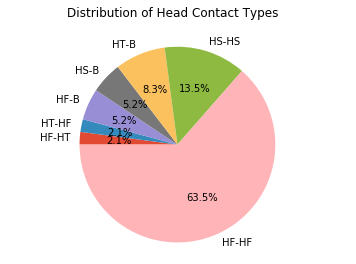

In [284]:
# Display head-contact combinations in a pie plot

labels, sizes = plot_prepare(stats)

import matplotlib.pyplot as plt
import pylab

fig1, ax1 = plt.subplots()

# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=180,
       counterclock=False)
 
plt.style.use('ggplot')
plt.axis('equal')
plt.suptitle('Distribution of Head Contact Types')
plt.savefig('pie chart.png', dpi=1000)
plt.show()